<a href="https://colab.research.google.com/github/bziuk/Praca_Licencjacka/blob/main/K_JUST_WYKRESY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

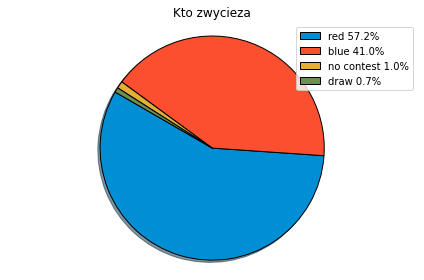

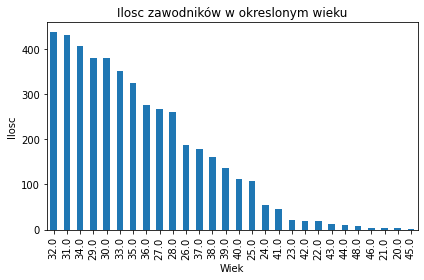

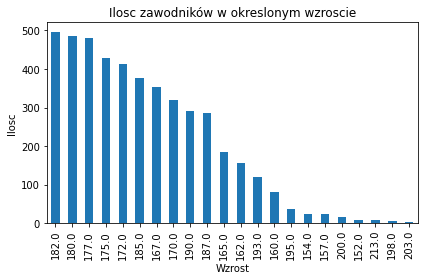

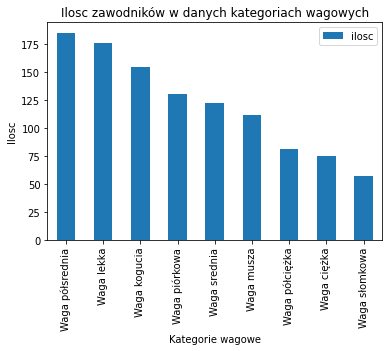

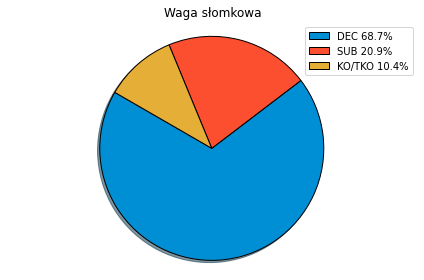

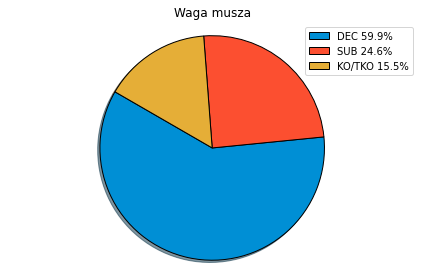

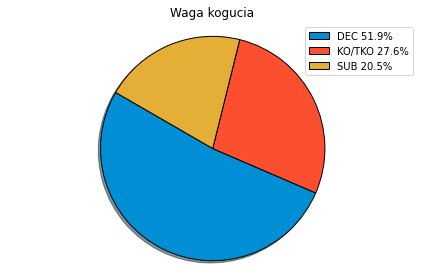

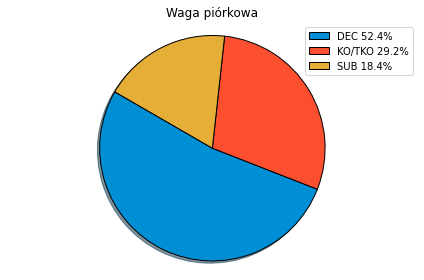

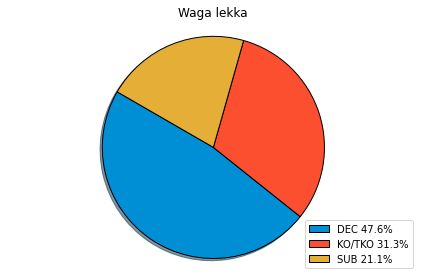

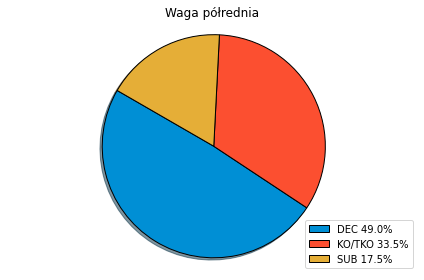

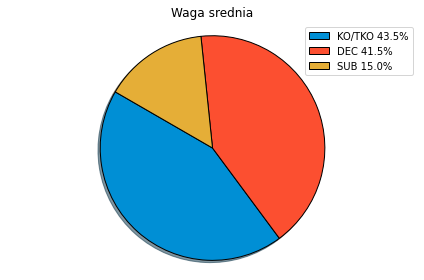

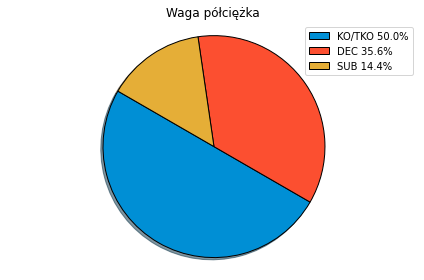

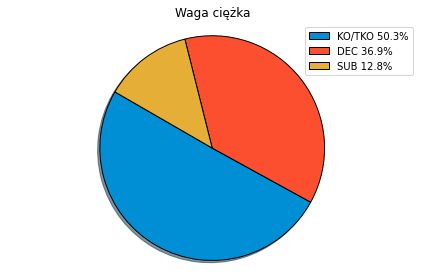

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('fighters.csv',index_col=0)

#%%
fight_results=df['winner'].value_counts()
labels = fight_results.index
sizes = fight_results.values
labels = [x + " {:.1%}".format(y/sum(sizes)) for x,y in zip(labels,sizes)]

#%%Przedstawienie wyników na wykresie kołowym
colors = ['#008fd5','#fc4f30','#e5ae37', '#6d904f']
plt.pie(sizes, startangle=150,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True)
plt.title("Kto zwycieza")
plt.legend(labels)
plt.axis('equal')  
plt.tight_layout()
plt.show()
#%%
#Zebranie danych o wieku zawodników i usunięcie wartości pustych
x = pd.concat([df['B_Age'],df['R_Age']]).dropna()
x_value_counts=x.value_counts()
x_value_counts.plot(kind='bar')

plt.title('Ilosc zawodników w okreslonym wieku')
plt.xlabel('Wiek')
plt.ylabel('Ilosc')
plt.tight_layout()
plt.show()


#%%
x = pd.concat([df['B_Height'],df['R_Height']]).dropna()
x_value_counts=x.value_counts()
x_value_counts.plot(kind='bar')

plt.title('Ilosc zawodników w okreslonym wzroscie')
plt.xlabel('Wzrost')
plt.ylabel('Ilosc')
plt.tight_layout()
plt.show()

#%%ILOSC W KATEGORIACH WAGOWYCH
#b_weight = pd.merge(df['B_Weight'],df['B_Name'],how='inner',left_index=True,right_index=True).dropna()
#r_weight=pd.merge(df['R_Weight'],df['R_Name'],how='inner',left_index=True,right_index=True).dropna()

b_weight=df[['B_Weight','B_Name']].dropna()
r_weight=df[['R_Weight','R_Name']].dropna()

b_weight.columns=['Weight','Name']
r_weight.columns=['Weight','Name']

x=b_weight.append(r_weight).drop_duplicates(subset='Name').reset_index().drop('Id',axis=1)
#%%
weights={'Waga słomkowa':0,'Waga musza':0,'Waga kogucia':0,'Waga piórkowa':0,'Waga lekka':0,'Waga półsrednia':0,'Waga srednia':0,'Waga półciężka':0,'Waga ciężka':0}

for key in range(x.shape[0]):
    if x['Weight'][key]>93:
        weights['Waga ciężka']+=1
    if x['Weight'][key]==93:
        weights['Waga półciężka']+=1
    elif x['Weight'][key]==84:
        weights['Waga srednia']+=1
    elif x['Weight'][key]==77:
        weights['Waga półsrednia']+=1
    elif x['Weight'][key]==70:
        weights['Waga lekka']+=1
    elif x['Weight'][key]==65:
        weights['Waga piórkowa']+=1
    elif x['Weight'][key]==61:
        weights['Waga kogucia']+=1
    elif x['Weight'][key]==56:
        weights['Waga musza']+=1
    elif x['Weight'][key]==52:
        weights['Waga słomkowa']+=1
#%%
x=pd.DataFrame.from_dict(weights,orient='index')
x.columns=['ilosc']
x=x.sort_values(by=['ilosc'],ascending=False)

x.plot(kind='bar')
plt.title('Ilosc zawodników w danych kategoriach wagowych')
plt.xlabel('Kategorie wagowe')
plt.ylabel('Ilosc')

plt.show()

#%%POCZATEK OSTATNIEGO WYKRESU
winby=df[['B_Weight','winby']].dropna()
#%%
winby.columns=['Weight','Winby']
#%%
def weight_category(weight):
    weight=int(weight)
    if weight==52:
        return 'Waga słomkowa'
    elif weight==56:
        return 'Waga musza'
    elif weight==61:
        return 'Waga kogucia'
    elif weight==65:
        return 'Waga piórkowa'
    elif weight==70:
        return 'Waga lekka'
    elif weight==77:
        return 'Waga półrednia'
    elif weight==84:
        return 'Waga srednia'
    elif weight==93:
        return 'Waga półciężka'
    else:
        return 'Waga ciężka'
        
winby['Weight_Category']=winby['Weight'].apply(lambda x:weight_category(x))
#%%
categories=['Waga słomkowa','Waga musza','Waga kogucia','Waga piórkowa','Waga lekka','Waga półrednia','Waga srednia','Waga półciężka','Waga ciężka']
winby_pie = []
for w_c in categories:
    winby_pie.append(winby[winby['Weight_Category']==w_c]["Winby"].value_counts())
   
#%%wykresy
for i,title in enumerate(categories):
    labels=winby_pie[i].index
    sizes=winby_pie[i].values
    labels = [x + " {:.1%}".format(y/sum(sizes)) for x,y in zip(labels,sizes)] 
    colors = ['#008fd5','#fc4f30','#e5ae37', '#6d904f']
    plt.pie(sizes, startangle=150,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True)
    plt.title(title)
    plt.legend(labels)
    plt.axis('equal')  
    plt.tight_layout()
    plt.show()




    
